In [4]:
import os
import glob
from pathlib import Path
import numpy as np

import wispy.model_utils
import wispy.utils

import wispy.logger
import argparse

import matplotlib as mpl
import matplotlib.pyplot as plt

# mpl.use("agg")

from cycler import cycler
from itertools import cycle

# mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use("ggplot")
mpl.rcParams.update({"font.size": 16})

In [5]:
from collections import OrderedDict

In [6]:
hfiles = sorted(glob.glob("results*/history*"))
print(hfiles)

histories = OrderedDict()
for hfile in hfiles:
    key = hfile.split('/')[0]
    histories[key] = wispy.model_utils.load_history(hfile)

['results_1/history.pickle', 'results_2/history.pickle', 'results_3/history.pickle', 'results_4/history.pickle', 'results_5/history.pickle', 'results_6/history.pickle', 'results_7/history.pickle']


In [7]:
tfiles = sorted(glob.glob("results*/duration*"))
print(tfiles)

durations = OrderedDict()
for tfile in tfiles:
    key = tfile.split('/')[0]
    durations[key] = wispy.model_utils.load_datetime(tfile)

['results_1/duration.pickle', 'results_2/duration.pickle', 'results_3/duration.pickle', 'results_4/duration.pickle', 'results_5/duration.pickle', 'results_6/duration.pickle', 'results_7/duration.pickle']


In [8]:
for k,v in durations.items():
    print(k, v)

results_1 0:20:14.987251
results_2 1:47:11.654012
results_3 1:51:06.771205
results_4 0:02:42.903243
results_5 0:36:22.206195
results_6 0:36:18.044282
results_7 15:48:44.960224


In [9]:
histories.keys()

odict_keys(['results_1', 'results_2', 'results_3', 'results_4', 'results_5', 'results_6', 'results_7'])

In [10]:
# histories['001'].keys()

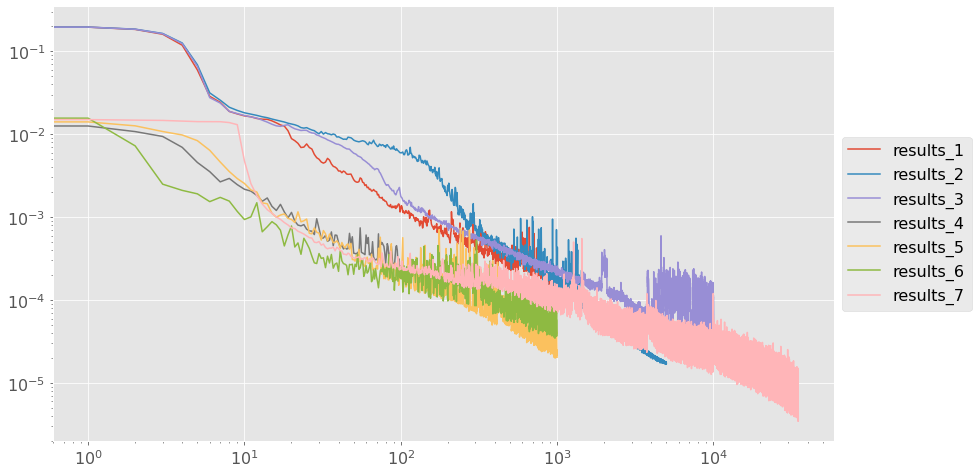

In [11]:
plt.figure(figsize=(14, 8))
for k,v in histories.items():
    plt.plot(v['mse'], label=k)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.yscale('log')
plt.xscale('log')
# plt.ylim(1e-4, 1e-3)

In [12]:
plt.figure(figsize=(14, 8))

for k,v in histories.items():
    if '_4' in k:
        plt.plot(v['mse'], '-', label=k)
for k,v in histories.items():
    if '_4' in k:
        plt.plot(v['val_mse'], '--', label=k+'-val')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.yscale('log')
# plt.xscale('log')

In [13]:
plt.figure(figsize=(14, 8))

for k,v in histories.items():
    plt.plot(v['mse'], '-', label=k)
for k,v in histories.items():
    plt.plot(v['val_mse'], '--', label=k+'-val')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.yscale('log')
# plt.xscale('log')

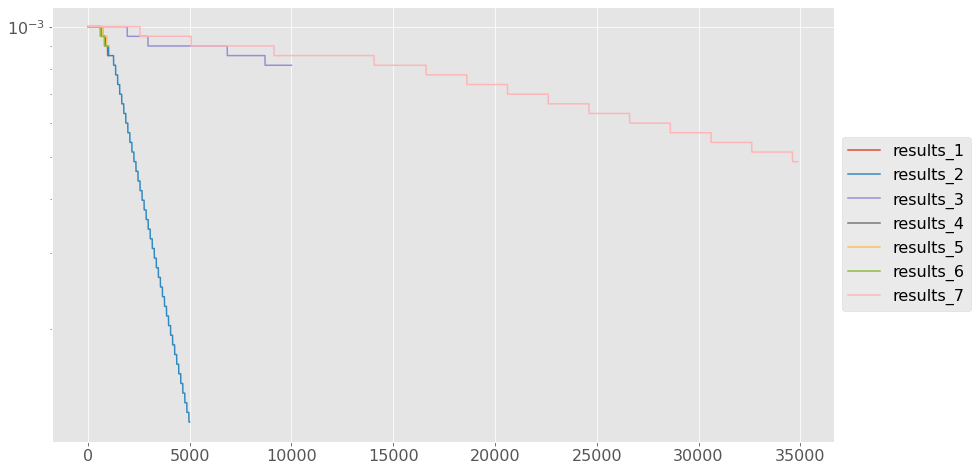

In [14]:
plt.figure(figsize=(14, 8))

for k,v in histories.items():
    if 'lr' in v.keys():
        plt.plot(v['lr'], '-', label=k)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.yscale('log')
# plt.xscale('log')